To use with JupiterLab:
1. install node.js
2. run commands:
        pip install ipympl
        jupyter labextension install @jupyter-widgets/jupyterlab-manager
        jupyter labextension install jupyter-matplotlib
3. add to preamble:
    `%matplotlib widget` (for jupyter notebook use `%matplotlib notebook` instead)

**USAGE**

__To begin__, look at the first cell in the *Initialization* section and modify the paths:

`sys.path.insert(0, 'E:/My_documents/c++/CHAMPS/ObjectMCE/ObjectMCE/bin_r/Release')` - path to `PyMCE.pyd` file,

`sys.path.insert(0, 'E:/My_documents/c++/CHAMPS/ObjectMCE/Uses/packages')` - path to utility packages (see *Uses* folder).


Then, sequentially execute everything in the sections:
- *Initialization*,
- *General definitions*,

and also *Initialization* subection in *Simple Tunneling*.

---

__To run the simulations__, choose any of the cells in *Calculations* subsection of the *Simple tunneling* section, replace `simple_tunneling_simulation(False)` with `simple_tunneling_simulation(True)` and run the cell. Use *stop* button to interrupt the computation. 

In a single computation, one can combine two different methods of propagation of basis squeezed coherent states.
- `primary_method = methods_list[101]` - use method 101 from the table below as the primary method
- `secondary_method = methods_list[3]` - use method 3 from the table below as the secondary method
- `secondary_method_basis_size = 0` - defines how many basis function are propagated using the secondary method

The initial basis set is identical for all calculations. One can change it by modifying `SimpleTunnelingInit` function.

**Description of methods**

 \#  | Abbreviation | Description
----------:|:------------:|:------------
         1 | "QPv1" | Husimi representation in "default" gauge A=0
         2 | "QPv2" | Approximate regularized Bohmian representation
         3 | "QPv3" | Regularized Bohmian representation
       101 | "GRCH" | improved variant of Bohmian propagator described in B. Gu and S. Garashchuk, J. Phys. Chem. A 120, 3023 (2016), where momenta of Gaussions p!=0 and calculated variationally.
       201 | "SLCH" | CCS method
     
---

__To produce the graphics__, execute everything in **Graphical tools** and **Plots and animations** subsections of the visualization section. Then, load calculated data and build the plots by sequentially exectuting commands in **Plots** subsection.


# Initialization

In [3]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

import matplotlib
matplotlib.use('module://ipympl.backend_nbagg')

import sys
sys.path.insert(0, 'E:/My_documents/c++/CHAMPS/ObjectMCE/ObjectMCE/bin_r/Release')
sys.path.insert(0, 'E:/My_documents/c++/CHAMPS/ObjectMCE/Uses/packages') #path to utility packages

from InitPyMCE import *
from PlotWavefunction import *
from ControlWidgets import *
from InitPyMCE import *
from SplitOperatorPropagate import *
from DataSerialize import *

import threading
import numpy as np
import math
import json
from tabulate import tabulate

#%matplotlib inline
#%matplotlib notebook
%matplotlib widget

## Basic code checks

### Basic evaluator tests

In [4]:
# 1D checks
wavefunction_factory = PyMCE.WavefunctionFactory(1, 1, 1, 5)
# corresponds to alpha = 1/2
wavefunction_factory2 = PyMCE.WavefunctionFactory(1, 1, 0.7, 5)
# corresponds to alpha = 0.35
ket = wavefunction_factory.Create(1)
bra = wavefunction_factory.Create(1)
bra2 = wavefunction_factory2.Create(1)
ket[0].GetCenter(0).X(3)
ket[0].GetCenter(0).P(4)
bra2[0].GetCenter(0).X(2)
bra2[0].GetCenter(0).P(1)

ASSERT_EQ((X().Evaluate(ket))(0, 0), 3)
ASSERT_EQ((P().Evaluate(ket))(0, 0), 4)
ASSERT_EQ(((X() * X()).Evaluate(ket))(0, 0), 9.5)
ASSERT_EQ(((P() * P()).Evaluate(ket))(0, 0), 16.5)
ASSERT_EQ(((2 * (2 * P() * P() + 2 * X() * X())).Evaluate(ket))(0, 0), 104)
ASSERT_EQ(((Exp((-0.75) * X() * X())).Evaluate(ket))(0, 0), 0.015971478341765)
ASSERT_EQ(((Exp((-0.75) * X()**2)).Evaluate(ket))(0, 0), 0.015971478341765)
ASSERT_EQ(((Exp((-0.75) * X() * X())).Evaluate(bra, ket))(0, 0),
          -0.0020311066133690296 - 0.0023277531974258115j)
ASSERT_EQ(((Exp((-0.75) * X() * X())).Evaluate(bra, ket))(0, 0),
          -0.0020311066133690296 - 0.0023277531974258115j)
ASSERT_EQ(((Exp((-0.75) * X() * X() + 2j * X() + 5 * Id())).Evaluate(
    bra, ket))(0, 0), 0.02211296122249989 - 0.014297494478745015j)
ASSERT_EQ(((X() * X() * X()).Evaluate(bra, ket))(0, 0),
          -0.02752275301507693 + 0.009080239759175617j)
ASSERT_EQ(((X() * X() * X()).Evaluate(bra, ket))(0, 0),
          -0.02752275301507693 + 0.009080239759175617j)
ASSERT_EQ(((Id()).Evaluate(bra2, ket))(0, 0),
          -0.15648039879774778 - 0.020166617068834974j)
ASSERT_EQ(((X() * X() * X()).Evaluate(bra2, ket))(0, 0),
          -0.9479010333893964 - 2.677839189656372j)
ASSERT_EQ(((X()).Evaluate(ket))(0, 0), 3)
ASSERT_EQ(((X() * Exp(((-1) * X() * X()))).Evaluate(ket))(0, 0),
          0.011782870176553514)
ASSERT_EQ((((2 * Id() + X() + X() * X() * X()) *
            Exp((-0.75) * X() * X() + 2j * X() + 5 * Id())).Evaluate(
                bra2, ket))(0, 0), 1.860057058621944 - 2.542413867300542j)
ASSERT_EQ(((P() * (2 * Id() + X() + X() * X() * X()) *
            Exp((-0.75) * X() * X() + 2j * X() + 5 * Id())).Evaluate(
                bra2, ket))(0, 0), 6.683508175168627 - 7.402750717099355j)
#checking complex conjugate of above...
ASSERT_EQ((((2 * Id() + X() + X() * X() * X()) *
            Exp((-0.75) * X() * X() - 2j * X() + 5 * Id()) * P()).Evaluate(
                ket, bra2))(0, 0), 6.683508175168627 + 7.402750717099355j)

[OK]
[OK]
[OK]
[OK]
[OK]
[OK]
[OK]
[OK]
[OK]
[OK]
[OK]
[OK]
[OK]
[OK]
[OK]
[OK]
[OK]
[OK]
[OK]


In [5]:
# 2D checks
wavefunction_factory = PyMCE.WavefunctionFactory(1, 2, 1, 5)
# corresponds to alpha = 1/2
ket = wavefunction_factory.Create(1)
ket[0].GetCenter(0).X(3)
ket[0].GetCenter(0).P(4)
ket[0].GetCenter(1).X(5)
ket[0].GetCenter(1).P(6)

ASSERT_EQ((X(0) * X(1) + P(0) * P(1) + Id(0) + X(1)).Evaluate(ket)(0, 0), 45)
ASSERT_EQ((-X(0)**1 * X(1) + P(0) * P(1) + Id(0) + X(1)).Evaluate(ket)(0, 0),
          15)

[OK]
[OK]


### Wavefunction tests

In [6]:
wavefunction_factory = PyMCE.WavefunctionFactory(1, 1, 1, 5)
wavefunction_factory2 = PyMCE.WavefunctionFactory(1, 1, 1, 5)
ket = wavefunction_factory.Create(1)
ket[0].GetCenter(0).X(3)
ket[0].GetCenter(0).P(4)
ket[0].GetMultiplier().Amplitude(3 - 4j)
ket[0].GetMultiplier().Phase(5)

ket2 = wavefunction_factory.Create(1)
ket2[0].GetCenter(0).X(-3)
ket2[0].GetCenter(0).P(-4)
ket2[0].GetMultiplier().Amplitude(-3 + 4j)
ket2[0].GetMultiplier().Phase(-5)

ket4 = ket2.Clone(False);

ket3 = ket;
ket3 += ket + 2*ket2

print(ket3[0].GetCenter(0).X())
print(ket3[0].GetCenter(0).P())
print(ket3[0].GetMultiplier().Amplitude())
print(ket3[0].GetMultiplier().Phase())

print(ket4[0].GetCenter(0).X())
print(ket4[0].GetCenter(0).P())
print(ket4[0].GetMultiplier().Amplitude())
print(ket4[0].GetMultiplier().Phase())

0.0
0.0
0j
0.0
0.0
0.0
0j
0.0


### Wavefunction construction tests

In [7]:
wavefunction_factory =PyMCE.WavefunctionFactory(1,1,1,5);
ket1 = wavefunction_factory.Create(1);
ket2 = wavefunction_factory.Create(1);
ASSERT_EQ(ket1.Size(),1)
ket3 = ket1.Clone(True);
ket1 << ket3;
ASSERT_EQ(ket1.Size(),2)

[OK]
[OK]


### Complex projection test

In [8]:
H = X()**2 + P()**2
wf=PyMCE.WavefunctionFactory(1,1,1./2,500)
wf2=PyMCE.WavefunctionFactory(1,1,1.25/2,500)
initial_state = wf2.Create(2);
initial_state[0].GetCenter(0).X(1.3)
initial_state[0].GetCenter(0).P(1)
initial_state[0].GetMultiplier().Amplitude(1)
initial_state[1].GetCenter(0).X(0.7)
initial_state[1].GetCenter(0).P(1)
initial_state[1].GetMultiplier().Amplitude(0.5)
wavefunction = wf.CreateUniformSwarm2(0,[[1,1]],[[4./2,4./2]],[[0.4,0.4]])
PyMCE.Project(wavefunction,initial_state,0.0*P()*P()+0*X()*X()+Id(),True,1.e-14)
#PyMCE.Project(wavefunction,initial_state,Id(),True,0)
print(wavefunction.Size())
PyMCE.Filter(wavefunction,2.E-2)
print(wavefunction.Size())

121
47


In [9]:
points = np.arange(0.0, 2.0, 0.05,dtype=float)
values = np.full(points.size,0,dtype=complex)
for i in range(0, len(values)):
    values[i] = (PyMCE.Value(initial_state,[points[i]]))
plt.plot(points,np.real(values), 'ro');

for i in range(0, len(values)):
    values[i] = (PyMCE.Value(wavefunction,[points[i]]))
    
plt.plot(points,np.real(values));
plt.show()
max_amplitude=0
for i in range(0, wavefunction.Size()):
    max_amplitude = max(max_amplitude,abs(wavefunction[i].GetMultiplier().Amplitude()))
    #print(wavefunction[i].GetMultiplier().Amplitude())
print("maximal amplitude = ",max_amplitude)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

maximal amplitude =  0.0730474422480687


In [10]:
Id().Evaluate(wavefunction,wavefunction).Mean()- \
Id().Evaluate(wavefunction,initial_state).Mean() - \
Id().Evaluate(initial_state, wavefunction).Mean() + \
Id().Evaluate(initial_state, initial_state).Mean()

(0.05883398002310636-1.734723475976807e-18j)

# General definitions

## Run!

In [11]:
def ExecuteSimulation(epilog=lambda: 0,
                      set_adaptive_flag=True,
                      phase_regularize_scale=1,
                      clone_function=lambda wavefunction, time: False,
                      husimi_width_factors=[1., 1],
                      so_xlim=[-8.5, 8.5],
                      initial_time_step=0.02,
                      gauge_approximation_order=0):
    schrodinger_system = PyMCE.CCSSchrodingerWerewolfSystem(
        H,
        Id() + 0.0 * P() * P() * P() * P(), operator_factory)
    schrodinger_system.SetSmoothingScale(system_smoothing_scale)
    schrodinger_system.SetRegularizer(system_regularizer)
    schrodinger_system.SetMomentumMMARegularizer(
        system_momentum_mma_regularizer)
    schrodinger_system.SetAmplitudeMMARegularizer(
        system_amplitude_mma_regularizer)
    schrodinger_system.SetReprojectionRegularizer(reprojection_regularizer)
    schrodinger_system.SetHusimiWidthFactors(husimi_width_factors[0],
                                             husimi_width_factors[1])

    schrodinger_system.SetRegularizePhaseScale(phase_regularize_scale)
    schrodinger_system.SetGaugeApproximationOrder(gauge_approximation_order)

    #PyMCE.CCSWerewolfPolicy(schrodinger_system);
    #werewolf_policy.SetToGarashchuchishcheThreshold(0.15)

    global simulation_data
    global wavefunction
    global original_wavefunction
    global simulation_data_properties

    simulation_data_properties = {
        "potential_scale":
        potential_scale,
        "wavefunction_scale":
        wavefunction_scale,
        "p_potential":
        str(inspect.getsourcelines(p_potential)[0][0]).strip("['\\n']").split(
            " = ")[1],
        ######### other simulation parameters #########
        "system_smoothing_scale":
        system_smoothing_scale,
        "system_regularizer":
        system_regularizer,
        "system_momentum_mma_regularizer":
        system_momentum_mma_regularizer,
        "system_amplitude_mma_regularizer":
        system_amplitude_mma_regularizer,
        "absolute_error_tolerance":
        absolute_error_tolerance,
        "relative_error_tolerance":
        relative_error_tolerance
    }

    original_wavefunction = wavefunction.Clone(True)

    info = widgets.Label(value="-")
    display(info)
    global stop_button
    stop_button = StopButton()

    simulation_data = []

    evolution_monitor = plt.figure(figsize=(9, 3.5))
    evolution_monitor.set_tight_layout(True)
    evolution_monitor_axes = evolution_monitor.gca()
    PlotWavefunction(
        evolution_monitor_axes,
        wavefunction,
        "g",
        0,
        potential=lambda x: potential_scale * p_potential(x),
        wavefunction_scale=wavefunction_scale)

    propagator = PyMCE.CCSPropagator()
    if (set_adaptive_flag == False):
        propagator.SetAdaptiveFlag(False)
    if (werewolf_policy != None):
        propagator.SetWerewolfPolicy(werewolf_policy)

    ##########  so  ############
    global so_state, so_delta_x, so_delta_t, so_points
    global restart_due_to_cloning
    so_delta_x = 0.1
    so_delta_t = 0.01
    so_points = np.arange(so_xlim[0], so_xlim[1], so_delta_x, dtype=float)
    so_state = np.fromfunction(
        np.vectorize(
            lambda i: PyMCE.Value(wavefunction, [so_points[i]]) / wavefunction_scale
        ), (so_points.size, ),
        dtype=int)
    ####### end of so  #########

    global last_time_point
    last_time_point = 0
    global step_no_offset
    step_no_offset = 0

    # needed only for split operator reference

    restart_due_to_cloning = False

    def observer2(state, time, step_no):
        ##########  so  ############
        global last_time_point
        global so_state
        global restart_due_to_cloning
        global step_no_offset
        so_state = SplitOperatorPropagate(
            time - last_time_point,
            so_state,
            p_potential,
            so_xlim[0],
            so_delta_x,
            so_delta_t,  #time - last_time_point,
            mass=1,
            hbar=1)
        last_time_point = time
        ####### end of so  #########
        overall_step_no = step_no_offset + step_no
        global simulation_data
        simulation_data.append(
            [time, overall_step_no,
             wavefunction.Clone(True),
             so_state.copy()])
        info.value = "time = " + ('%.5f' % time) + ", step #" + (
            '%5d' % overall_step_no) + ", \u27E8H\u27E9=" + ('%.5f' % (
                H.Evaluate(state).Mean() / Id().Evaluate(state).Mean()).real)

        PlotWavefunction(
            evolution_monitor_axes,
            state,
            "g",
            time,
            potential=lambda x: potential_scale * p_potential(x),
            text=", step #" + ('%5d' % overall_step_no) + ", \u27E8H\u27E9=" +
            ('%.5f' %
             (H.Evaluate(state).Mean() / Id().Evaluate(state).Mean()).real),
            wavefunction_scale=wavefunction_scale,
            so_points=so_points,
            so_values=so_state)
        evolution_monitor.canvas.draw()
        ##########  cloning  ############
        if (clone_function(wavefunction, time)):
            restart_due_to_cloning = True
            step_no_offset = step_no_offset + step_no
            return False
        ######  end of cloning  #########
        return not stop_button.stop

    def work():
        global stop_button
        global simulation_data
        global last_time_point
        global restart_due_to_cloning

        while (True):
            try:
                propagator.ObservedIntegrate(
                    schrodinger_system, wavefunction, last_time_point,
                    integration_time, initial_time_step, observer2, 2000000,
                    absolute_error_tolerance, relative_error_tolerance)
            except:
                if (restart_due_to_cloning == False):
                    info.value = info.value + "Integration ended with exception."
                    break
                else:
                    info.value = info.value + " - Clonning happened (exc)..."
            finally:
                if (restart_due_to_cloning == False):
                    epilog()
                    stop_button.close()
                    info.value = info.value + " - integration finished."
                    break
                else:
                    info.value = info.value + "Clonning happened..."
                restart_due_to_cloning = False

    #work();
    thread = threading.Thread(target=work)  #, args=(progress,button))
    thread.start()

## Data treatment utils and plotting styles

In [12]:
ticks_width = 0.5
ticks_minor_length = 4
ticks_major_length = 8

#from matplotlib import rc
#from matplotlib import font_manager
##rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#plt.rcParams.update({'font.family': 'DejaVu Sans', 'font.size': 22})
#plt.rcParams.update({'font.family': 'Computer Modern', 'font.size': 12})
plt.rcParams.update({
    "font.family": "Times New Roman", #"font.family": "DejaVu Serif", #"font.family": "Times New Roman",
    "font.serif": "STIX",
    "mathtext.fontset": "stix",
    'font.size': 12
})
plt.rcParams.usetex = True
plt.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{amssymb}',
    r'\usepackage{xcolor}',
    r"\definecolor{wavefunctioncolor}{HTML}{007F00}",
    r"\definecolor{momentumcolor}{HTML}{000000}",
]


#rc('text', usetex=True)

def ApplyAxisStyle(axis, ticks_positions, color="#000000"):
    axis.xaxis.labelpad = 0
    axis.yaxis.labelpad = 0
    axis.xaxis.set_major_locator(plt.MultipleLocator(ticks_positions[0][0]))
    axis.xaxis.set_minor_locator(plt.MultipleLocator(ticks_positions[0][1]))
    axis.yaxis.set_major_locator(plt.MultipleLocator(ticks_positions[1][0]))
    axis.yaxis.set_minor_locator(plt.MultipleLocator(ticks_positions[1][1]))
    axis.tick_params(
        axis='y',
        direction='in',
        width=ticks_width,
        length=ticks_major_length,
        which='major',
        colors=color)
    axis.tick_params(
        axis='y',
        direction='in',
        width=ticks_width,
        length=ticks_minor_length,
        which='minor',
        colors=color)
    axis.tick_params(
        axis='x',
        direction='in',
        width=ticks_width,
        length=ticks_major_length,
        which='major',
        colors=color)
    axis.tick_params(
        axis='x',
        direction='in',
        width=ticks_width,
        length=ticks_minor_length,
        which='minor',
        colors=color)

In [13]:
def GetSOStates(so_points, simulation_data):
    info = widgets.Label(value="-")
    display(info)
    so_states = [None] * len(simulation_data)
    wavefunction = simulation_data[0][2]
    norm = abs(Id().Evaluate(wavefunction).Mean())**0.5
    so_states[0] = np.fromfunction(
        np.vectorize(
            lambda i: PyMCE.Value(wavefunction, [so_points[i]]) / norm  #/ wavefunction_scale
        ),
        (so_points.size, ),
        dtype=int)
    for i in range(1, len(so_states)):
        info.value = ('%5d' % i)
        delta_t = simulation_data[i][0] - simulation_data[i - 1][0]
        so_states[i] = SplitOperatorPropagate(
            delta_t,
            so_states[i - 1],
            p_potential,
            so_xlim[0],
            so_delta_x,
            min(delta_t, 0.01),  # time step
            mass=1,
            hbar=1)
    info.close()
    return so_states


def GetCSStates(so_points, simulation_data):
    info = widgets.Label(value="-")
    display(info)
    cs_states = [None] * len(simulation_data)
    for i in range(0, len(cs_states)):
        info.value = ('%5d' % i)
        wavefunction = simulation_data[i][2]
        norm = abs(Id().Evaluate(wavefunction).Mean())**0.5
        cs_states[i] = np.fromfunction(
            np.vectorize(
                lambda i: PyMCE.Value(wavefunction, [so_points[i]]) / norm  # / wavefunction_scale
            ),
            (so_points.size, ),
            dtype=int)
    info.close()
    return cs_states


def GetGraphicsData(so_points, simulation_data, quality_factor_xmin=0):
    info = widgets.Label(value="getting CS states...")
    display(info)
    cs_states = GetCSStates(so_points, simulation_data)
    info.value = "getting SO states..."
    so_states = GetSOStates(so_points, simulation_data)
    zero_point = np.min(np.where(so_points > 0 + 1.e-10))
    info.value = "getting times, energies, quality factors and tunneling probabilities..."
    cs_steps = [simulation_data[k][1] for k in range(len(so_states))]
    so_times = [simulation_data[k][0] for k in range(len(so_states))]
    so_tunneling_probability = [
        sum(abs(x)**2
            for x in so_states[k][zero_point:-1].tolist()) * so_delta_x
        for k in range(len(so_states))
    ]
    info.value = info.value + "*"
    cs_tunneling_probability = [
        sum(abs(x)**2
            for x in cs_states[k][zero_point:-1].tolist()) * so_delta_x
        for k in range(len(so_states))
    ]
    info.value = info.value + "*"
    cs_energies = [(H.Evaluate(simulation_data[k][2]).Mean() / Id().Evaluate(
        simulation_data[k][2]).Mean()).real for k in range(len(so_states))]
    info.value = info.value + "*"
    qf_zero_point = np.min(np.where(so_points > quality_factor_xmin + 1.e-10))
    sc_quality_factor = [
        (abs(
            sum([
                x for x in np.multiply(
                    np.conjugate(so_states[k][qf_zero_point:-1]), cs_states[k]
                    [qf_zero_point:-1]).tolist()
            ]))**
         2) / (sum(abs(x)**2
                   for x in so_states[k][qf_zero_point:-1].tolist()) * sum(
                       abs(x)**2
                       for x in cs_states[k][qf_zero_point:-1].tolist()))
        for k in range(len(so_states))
    ]
    info.close()
    return {
        "cs_states": cs_states,
        "so_states": so_states,
        "so_times": so_times,
        "cs_steps": cs_steps,
        "so_tunneling_probability": so_tunneling_probability,
        "cs_tunneling_probability": cs_tunneling_probability,
        "sc_quality_factor": sc_quality_factor,
        "cs_energies": cs_energies
    }


def TimeCut(dataset, parameter, time):
    time_offset = np.min(np.where(np.array(dataset["so_times"]) > time))
    return dataset[parameter][time_offset:-1]

def GetFrameByTime(dataset,time):
    supertimes = np.where(np.array(dataset["so_times"]) >= time)[0]
    return np.min(supertimes) if supertimes.size>0 else None

def TabulateWavefunction(wavefunction):
    last_state_data_table=[[tmp_index,
          np.abs(wavefunction[tmp_index].GetMultiplier().Amplitude()), \
          np.angle(wavefunction[tmp_index].GetMultiplier().Amplitude()*np.exp(1j*wavefunction[tmp_index].GetMultiplier().Phase())), \
          wavefunction[tmp_index].GetCenter(0).P(),
          wavefunction[tmp_index].GetCenter(0).X()
          #,wavefunction[tmp_index].GetCenter(0).P()*wavefunction[tmp_index].GetCenter(0).P()+wavefunction[tmp_index].GetCenter(0).X()*wavefunction[tmp_index].GetCenter(0).X() \
                       ] for tmp_index in range(wavefunction.Size())]
    return tabulate(last_state_data_table, headers=["#", "|a|", "arg(a)", "p","x"], tablefmt='orgtbl')

# Simple tunneling

## Initialization

In [14]:
def SimpleTunnelingInit(truncate=False, delta_p=1., nose_delta_p=-1):
    global wf
    wf = PyMCE.WavefunctionFactory(1, 1, 1. / 2, 500)
    wf_init = PyMCE.WavefunctionFactory(1, 1, 2. / 2, 500)
    initial_state = wf_init.Create(1)
    initial_state[0].GetCenter(0).X(-4)
    initial_state[0].GetCenter(0).P(0)
    initial_state[0].GetMultiplier().Amplitude(10)

    if (nose_delta_p < 0):
        nose_delta_p = delta_p

    global wavefunction
    wavefunction = wf.Create(0)
#     for i in range(-1, 2, 1):
#         wavefunction << wf.CreateUniformSwarm2(
#             0, [[-1.535 + i * 0.165, i * nose_delta_p]], [[0.4, 0.1]],
#             [[0.165 * 3, 0.99]])
#     for i in range(-1, 2, 1):
#         wavefunction << wf.CreateUniformSwarm2(
#             0, [[-4.5 + i * 0.99 / 3, i * delta_p]], [[2., 0.001]],
#             [[0.99, 1.]])
    nose_delta_x=0.12
    for i in range(-1, 2, 1):
        wavefunction << wf.CreateUniformSwarm2(
            0, [[-1.75 + i * nose_delta_x, i * nose_delta_p]], [[nose_delta_x*2, 0.1]],
            [[nose_delta_x * 3, 0.99]])
    for i in range(-1, 2, 1):
        wavefunction << wf.CreateUniformSwarm2(
            0, [[-2.25 + i * 0.1, i * nose_delta_p]], [[0.1, 0.1]],
            [[0.1 * 3, 0.99]])
    for i in range(-1, 2, 1):
        wavefunction << wf.CreateUniformSwarm2(
            0, [[-4.25 + i * 1. / 3, i * delta_p]], [[1.5, 0.001]],
            [[1., 1.]])

    kernel = 0.1 * X() * X() + 1 * Id()
    PyMCE.Project(wavefunction, initial_state, kernel, True, 1.e-5)
    #PyMCE.Filter(wavefunction, 0.2E-2)
    global H
    H = 0.5 * P()**2 + 0.5 * X()**2 + 25 * Exp(-(X() * X()) * (1. / (0.35**2)))
    global p_potential
    p_potential = lambda x: (0.5 * x**2 + 25 * np.exp(-(x**2) * (1 / (0.35**2))))

    global wavefunction_scale
    wavefunction_scale = 10
    global potential_scale
    potential_scale = 0.02

    print("[OK] Wavefunction of size", wavefunction.Size(), "created.")
    print(
        "Energy of original state:               ",
        H.Evaluate(initial_state).Mean() / Id().Evaluate(initial_state).Mean())
    print("Energy of projected and filtered state: ",
          H.Evaluate(wavefunction).Mean() / Id().Evaluate(wavefunction).Mean())
    print("[OK] Hamiltonian and propagation auxiliaries created.", flush=True)

    print("[INFO] <Id(0)> = ", Id().Evaluate(wavefunction).Mean(), flush=True)
    print("[INFO] <H(0)> = ",
          H.Evaluate(wavefunction).Mean() / Id().Evaluate(wavefunction).Mean(),
          flush=True)

In [15]:
methods_list={
        1: [PyMCE.BasisFunctionNature.QuasiProbabilishche,"QPv1"], # Husimi representation in "default" gauge A=0
        2: [PyMCE.BasisFunctionNature.QuasiProbabilishche_v2,"QPv2"], # Approximate regularized Bohmian representation
        3: [PyMCE.BasisFunctionNature.QuasiProbabilishche_v3,"QPv3"], # Regularized Bohmian representation
        4: [PyMCE.BasisFunctionNature.QuasiProbabilishche_v4,"QPv4"], # /for test purposes/
        101: [PyMCE.BasisFunctionNature.Garashchuchishche,"GRCH"], # improved variant of Bohmian propagator described in B. Gu and S. Garashchuk, J. Phys. Chem. A 120, 3023 (2016),
                                                                   # where momenta of Gaussions p!=0 and calculated variationally
        201: [PyMCE.BasisFunctionNature.Shalashilishche,"SLCH"],   # CCS method
        301: [PyMCE.BasisFunctionNature.ShaloBohmishche, "SBv1"],  # /for test purposes/
        302: [PyMCE.BasisFunctionNature.ShaloBohmishche_v2, "SBv2"]# /for test purposes/
        }

# --- Global variables ---
primary_method = methods_list[3]
secondary_method = methods_list[3]
kernel_scale = 1.1
secondary_method_basis_size = 0
system_regularizer = 10 * 10.E-4
system_momentum_mma_regularizer = 1000
system_amplitude_mma_regularizer = 100
reprojection_regularizer = -1.e-3
werewolf_policy = None
gauge_approximation_order = 4


integration_time = 4 * 3.14
# --- end of global variables ---

def simple_tunneling_simulation(really_run=True):
    do_clone = False  #True;
    adaptive_flag = True
    delta_p = 2.
    nose_delta_p = 2.

    SimpleTunnelingInit(
        delta_p=delta_p,
        nose_delta_p=nose_delta_p)
    
    global system_smoothing_scale
    system_smoothing_scale = kernel_scale / np.sqrt(2.)

    wavefunction.SetNature(primary_method[0])
    
    global absolute_error_tolerance
    global relative_error_tolerance 
    absolute_error_tolerance = 0.1e-4 * pow(wavefunction_scale, 1)
    relative_error_tolerance = 0.1e-4

    for i in range(secondary_method_basis_size):
        wavefunction[i].Nature(secondary_method[0])
    if (secondary_method_basis_size>0):
        print(("[INFO] Using %d secondary basis functions" % secondary_method_basis_size))

    clone_flags = np.zeros((6), dtype=bool)


    def CloneFunc(wavefunction, time):
        restart = False
        if (do_clone):
            dd = 0.75
            ww = 0.2
            for i in range(clone_flags.size):
                if ((clone_flags[i] == False)
                        and (wavefunction[i].GetCenter(0).X() > dd)):
                    clone_flags[i] = True
                    extension = wf.Create(1)
                    xx = wavefunction[i].GetCenter(0).X()
                    extension[0].GetCenter(0).X(xx)
                    extension[0].GetCenter(0).P(
                        ((Exp(-((X()-xx*Id())**2)*(ww**(-2)))*P()).Evaluate(wavefunction).Mean()/ \
                            Exp(-((X()-xx*Id())**2)*(ww**(-2))).Evaluate(wavefunction).Mean()).real
                    )
                    extension[0].GetMultiplier().Amplitude(0)
                    if (use_quasiprobability):
                        extension.SetNature(quasiprobability_kind)
                    else:
                        extension.SetNature(
                            PyMCE.BasisFunctionNature.Shalashilishche)
                    wavefunction << extension
                    restart = True
        return restart


    '''with open("garashchuchishe_tunneling3_05.json", "w") as write_file:
        json.dump(SerializeSimulationData(simulation_data), write_file)'''


    def SaveToFile():
        global simulation_data, simulation_data_properties
        try:
            with open(("simple_tunneling(run3)_05_method1=" + primary_method[1] + "_") + (("method2=" + secondary_method[1] + "_")
                       if (secondary_method_basis_size > 0) else "") +
                      ".json",
                      "w") as write_file:
                json.dump(
                    SerializeSimulationData(
                        simulation_data, simulation_data_properties), write_file)
        except:
            print("Error saving data.")


    #uncompyle6
    #joblib  - both threads and multiprocessing -1 machine +++
    #multiprocessing: distributed:
    # celery,  1-4 machines
    # dask - to parallelize numpy,pandas - 1-5 machines +++
    # pyspark 1000 machines +++
    if (really_run):
        ExecuteSimulation(
            SaveToFile,
            adaptive_flag,
            10,
            clone_function=CloneFunc,
            husimi_width_factors=[kernel_scale, kernel_scale],  #[1.1, 1.1],
            initial_time_step=0.001,
            gauge_approximation_order=gauge_approximation_order)  #[2*1.1,1.1/2])


## Calculations

In [29]:
#np.abs(PyMCE.Value(wavefunction,[-4.])/PyMCE.Value(wavefunction,[-2]))

In [16]:
%matplotlib widget
system_amplitude_mma_regularizer = 5
gauge_approximation_order = 4
primary_method = methods_list[3]
secondary_method = methods_list[3]
kernel_scale = 1.1
secondary_method_basis_size = 0
simple_tunneling_simulation(False)

[OK] Wavefunction of size 21 created.
Energy of original state:                (8.500005327529053+0j)
Energy of projected and filtered state:  (8.500010072213774-1.7569359760234067e-16j)
[OK] Hamiltonian and propagation auxiliaries created.
[INFO] <Id(0)> =  (99.99935465131767-3.2751579226442118e-15j)
[INFO] <H(0)> =  (8.500010072213774-1.7569359760234067e-16j)


Label(value='-')

Button(description='Click to stop', style=ButtonStyle())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [113]:
%matplotlib widget
system_amplitude_mma_regularizer = 5
gauge_approximation_order = 4
primary_method = methods_list[1]
secondary_method = methods_list[1]
kernel_scale = 1.1
secondary_method_basis_size = 0
simple_tunneling_simulation(False)

[OK] Wavefunction of size 21 created.
Energy of original state:                (8.500005327529053+0j)
Energy of projected and filtered state:  (8.500010072213774-1.7569359760234067e-16j)
[OK] Hamiltonian and propagation auxiliaries created.
[INFO] <Id(0)> =  (99.99935465131767-3.2751579226442118e-15j)
[INFO] <H(0)> =  (8.500010072213774-1.7569359760234067e-16j)


In [115]:
%matplotlib widget
system_amplitude_mma_regularizer = 5
gauge_approximation_order = 0
primary_method = methods_list[201]
secondary_method = methods_list[201]
kernel_scale = 1.1
secondary_method_basis_size = 0
simple_tunneling_simulation(False)

[OK] Wavefunction of size 21 created.
Energy of original state:                (8.500005327529053+0j)
Energy of projected and filtered state:  (8.500010072213774-1.7569359760234067e-16j)
[OK] Hamiltonian and propagation auxiliaries created.
[INFO] <Id(0)> =  (99.99935465131767-3.2751579226442118e-15j)
[INFO] <H(0)> =  (8.500010072213774-1.7569359760234067e-16j)


In [15]:
%matplotlib widget
system_amplitude_mma_regularizer = 5
gauge_approximation_order = 0
primary_method = methods_list[2]
secondary_method = methods_list[2]
kernel_scale = 1.1
secondary_method_basis_size = 0
#integration_time = 4.5
simple_tunneling_simulation(False)

[OK] Wavefunction of size 21 created.
Energy of original state:                (8.500005327529053+0j)
Energy of projected and filtered state:  (8.500010072213774-1.7569359760234067e-16j)
[OK] Hamiltonian and propagation auxiliaries created.
[INFO] <Id(0)> =  (99.99935465131767-3.2751579226442118e-15j)
[INFO] <H(0)> =  (8.500010072213774-1.7569359760234067e-16j)


Label(value='-')

Button(description='Click to stop', style=ButtonStyle())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [58]:
#prints current wavefunction data
print(last_time_point)
print(TabulateWavefunction(wavefunction))

7.553375209579407
|   # |        |a| |    arg(a) |         p |          x |
|-----+------------+-----------+-----------+------------|
|   0 |  0.101758  | -1.79955  |  -8.52494 |  1.38911   |
|   1 |  0.373558  |  2.81124  |  -6.56685 |  2.10772   |
|   2 | 16.577     | -1.1102   |  -3.49577 |  1.75224   |
|   3 |  5.13372   |  2.91458  |  -4.28326 |  2.27715   |
|   4 | 18.3772    |  1.26999  |  -3.66215 |  1.93565   |
|   5 |  1.71126   | -2.24967  |  -3.6978  |  2.45013   |
|   6 |  0.0825252 |  1.1852   | -18.8882  |  0.78241   |
|   7 |  7.75075   |  0.689396 |  -1.5867  |  1.02496   |
|   8 | 11.4734    | -2.6018   |  -2.0937  |  1.2157    |
|   9 |  0.223684  | -0.625094 |   2.21777 | -3.37287   |
|  10 |  4.74224   | -2.61178  |   2.11494 | -1.99148   |
|  11 |  6.73117   |  1.9034   |  -1.75419 | -0.924563  |
|  12 |  3.55542   |  0.61138  |  -3.16104 | -0.205339  |
|  13 |  1.31436   |  0.638536 |   4.61185 | -2.89775   |
|  14 | 10.0084    |  1.20703  |   2.93183 | -1.57342 

In [14]:
print(TabulateWavefunction(simulation_data_rec[0][2]))

NameError: name 'simulation_data_rec' is not defined

### Additional calculations

In [114]:
%matplotlib widget
system_amplitude_mma_regularizer = 30
gauge_approximation_order = 4
primary_method = methods_list[101]
secondary_method = methods_list[3]
kernel_scale = 1.1
secondary_method_basis_size = 0
simple_tunneling_simulation(False )

[OK] Wavefunction of size 21 created.
Energy of original state:                (8.500005327529053+0j)
Energy of projected and filtered state:  (8.500010072213774-1.7569359760234067e-16j)
[OK] Hamiltonian and propagation auxiliaries created.
[INFO] <Id(0)> =  (99.99935465131767-3.2751579226442118e-15j)
[INFO] <H(0)> =  (8.500010072213774-1.7569359760234067e-16j)


In [112]:
%matplotlib widget
system_amplitude_mma_regularizer = 5
gauge_approximation_order = 4
primary_method = methods_list[201]
secondary_method = methods_list[3]
kernel_scale = 1.1
secondary_method_basis_size = 9
simple_tunneling_simulation(False)

[OK] Wavefunction of size 21 created.
Energy of original state:                (8.500005327529053+0j)
Energy of projected and filtered state:  (8.500010072213774-1.7569359760234067e-16j)
[OK] Hamiltonian and propagation auxiliaries created.
[INFO] <Id(0)> =  (99.99935465131767-3.2751579226442118e-15j)
[INFO] <H(0)> =  (8.500010072213774-1.7569359760234067e-16j)
[INFO] Using 9 secondary basis functions


In [14]:
%matplotlib widget
system_amplitude_mma_regularizer = 5
gauge_approximation_order = 0
primary_method = methods_list[2]
secondary_method = methods_list[2]
kernel_scale = 1.
secondary_method_basis_size = 0
integration_time = 4.5
simple_tunneling_simulation(False)

[OK] Wavefunction of size 21 created.
Energy of original state:                (8.500005327529053+0j)
Energy of projected and filtered state:  (8.500010072213774-1.7569359760234067e-16j)
[OK] Hamiltonian and propagation auxiliaries created.
[INFO] <Id(0)> =  (99.99935465131767-3.2751579226442118e-15j)
[INFO] <H(0)> =  (8.500010072213774-1.7569359760234067e-16j)


Label(value='-')

Button(description='Click to stop', style=ButtonStyle())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Visualizations

### Graphical tools

In [29]:
so_xlim = [-9.0, 9.0]
so_delta_x = 0.05
so_delta_t = 0.005
so_points = np.arange(so_xlim[0], so_xlim[1], so_delta_x, dtype=float)

In [30]:
#simulation_data_properties_rec["p_potential"]

In [31]:
def LoadSavedData(filename):
    global simulation_data_properties_rec, \
        simulation_data_rec, p_potential, wavefunction_scale, potential_scale
    with open(filename, "r") as read_file:
        simulation_data_json = json.load(read_file)
        simulation_data_properties_rec = simulation_data_json[
            "properties"].copy()
        simulation_data_rec = ReconstructSimulationData(simulation_data_json)
        p_potential = eval(simulation_data_properties_rec["p_potential"])
        wavefunction_scale = simulation_data_properties_rec[
            "wavefunction_scale"]
        potential_scale = simulation_data_properties_rec["potential_scale"]
        del simulation_data_json
    return GetGraphicsData(so_points, simulation_data_rec)

In [32]:
def CustomPlot1(fig,
                plot_data_map,
                legend_loc=(1.1, 0.55),
                x_lim=None,
                y_lim_l=None,
                x_ticks_scale=2,
                y_ticks_scale_l=2,
                y_ticks_scale_r=0.5,
                legend_ncol=1,
                legends_order=None,
                y_lim_r=None
               ):
    ###%matplotlib
    #fig = plt.figure(figsize=(8+2, 5))
    right_color = "#606000"
    #wrwf_color = "green"
    #t_wrwf_color = "blue"
    #no_wrwf_color = "pink"
    #full_wrwf_color = "black"
    left_scale = 100
    time_cut = 1.1
    ax_l = fig.gca()
    ApplyAxisStyle(ax_l, [[x_ticks_scale, x_ticks_scale * 0.1],
                          [y_ticks_scale_l, y_ticks_scale_l * 0.1]])
    ax_l.set_ylabel(r"$\mathbb{P}_{\mathrm{tun}}$, $\times10^{-2}$")
    ax_l.set_xlabel(r"          $t$")
    ax_r = ax_l.twinx()
    ax_r.set_ylabel(r"$Q$ ", color=right_color)
    #ax_r.set_ylim([0,1])
    ApplyAxisStyle(ax_r, [[x_ticks_scale, x_ticks_scale * 0.1], [y_ticks_scale_r, 0.1*y_ticks_scale_r]],
                   color=right_color)
    #ax_l.get_shared_y_axes().join(ax_l,ax_r)
    if (x_lim != None):
        ax_l.set_xlim(x_lim)
        ax_r.set_xlim(x_lim)
    if (y_lim_l != None):
        ax_l.set_ylim(y_lim_l)
    if (y_lim_r != None):
        ax_r.set_ylim(y_lim_r)

    pt, = ax_l.plot(plot_data_map[0][0]["so_times"],
                    np.array(plot_data_map[0][0]["so_tunneling_probability"]) *
                    left_scale,
                    "-",
                    color="orange",
                    label="Reference",
                    linewidth=2.5 * plot_data_map[0][2])
    plots_list = [pt]
    legends_list = ["Reference"]

    for i in range(len(plot_data_map)):
        pt, = ax_l.plot(
            plot_data_map[i][0]["so_times"],
            np.array(plot_data_map[i][0]["cs_tunneling_probability"]) *
            left_scale,
            "-",
            color=plot_data_map[i][1],
            linewidth=plot_data_map[i][2],
            label=plot_data_map[i][3])
        plots_list.append(pt)

    for i in range(len(plot_data_map)):
        legends_list.append(plot_data_map[i][3])
        ax_r.plot(TimeCut(plot_data_map[i][0], "so_times", time_cut),
                  TimeCut(plot_data_map[i][0], "sc_quality_factor", time_cut),
                  ":",
                  color=plot_data_map[i][1],
                  linewidth=plot_data_map[i][2],
                  dashes=(0.01, 2),
                  dash_capstyle='round',
                  label=plot_data_map[i][3])

    if (legends_order == None):
        legends_order = range(len(legends_list))

    ax_l.legend([legends_list[i] for i in legends_order],
                handles=[plots_list[i] for i in legends_order],
                loc=legend_loc,
                ncol=legend_ncol,
                borderpad=0.1 / legend_ncol,
                labelspacing=0,
                handlelength=1.5,
                frameon=False)

    fig.tight_layout()
    #plt.savefig("fig.03_hybrid.eps",bbox_inches="tight")
    return fig

In [36]:
def CustomAnimation2(filename,
                     title="",
                     sparsity=1,
                     time_step=-1,
                     fps=15,
                     dpi=100,
                     primary_color="orange",
                     secondary_offset=0,
                     secondary_color="red",
                     bitrate=1800):
    import os, math
    global generic_sample_data
    generic_sample_data = LoadSavedData(filename)
    import matplotlib.animation as animation
    frame = plt.figure(figsize=(9, 3.5))
    frame_axes = frame.gca()

    info = widgets.Label(value="-")
    display(info)

    def PlotSimulationData4(axes, data, i, so_values, title=''):
        return PlotWavefunction2(
            axes,
            data[i][2],
            "g",
            potential=lambda x: potential_scale * p_potential(x),
            parameters_values=[
                ('%.2f' % data[i][0]), ('%5d' % data[i][1]),
                ('%.5f' % (H.Evaluate(data[i][2]).Mean() /
                           Id().Evaluate(data[i][2]).Mean()).real)
            ],
            title=title,
            wavefunction_scale=wavefunction_scale,
            so_points=so_points,
            so_values=so_values[i],
            primary_color=primary_color,
            secondary_offset=secondary_offset,
            secondary_color=secondary_color)

    # Set up formatting for the movie files
    Writer = animation.writers['ffmpeg']
    writer = Writer(
        fps=fps,
        metadata=dict(artist='Dmitry Zhdanov'),
        bitrate=bitrate,
        codec='libx264',
        extra_args=['-preset', 'veryslow', '-tune', 'animation', '-crf',
                    '28'])  #,'-pix_fmt', 'pal8'])

    frame_indices = []
    t = 0
    if (time_step > 0):
        i = GetFrameByTime(generic_sample_data, t)
        while (i is not None):
            frame_indices.append(i)
            t = t + time_step
            i = GetFrameByTime(generic_sample_data, t)
    else:
        while (i < len(simulation_data_rec)):
            frame_indices.append(i)
            i = i + sparsity

    def next_frame(i=0):
        info.value = "step #" + ('%5d' % i) + " of " + ('%5d' %
                                                        len(frame_indices))
        return PlotSimulationData4(frame_axes, simulation_data_rec,
                                   frame_indices[i],
                                   generic_sample_data["so_states"], title)

    line_ani = animation.FuncAnimation(frame,
                                       next_frame,
                                       len(frame_indices),
                                       fargs=(),
                                       init_func=next_frame,
                                       interval=150,
                                       blit=True)
    ext = ".mp4"
    save_filename = "test" + ext
    line_ani.save(save_filename, writer=writer, dpi=dpi)
    os.rename('test' + ext, filename[:-5] + ext)
    del line_ani
    del frame

### Plots and animations

#### Plots

In [40]:
qp3_data = LoadSavedData("simple_tunneling(run3)_05_method1=QPv3_.json")

Label(value='getting CS states...')

Label(value='-')

Label(value='-')

In [38]:
qp2_data = LoadSavedData("simple_tunneling(run3)_05_method1=QPv2_.json")

Label(value='getting CS states...')

Label(value='-')

Label(value='-')

In [21]:
qp1_data = LoadSavedData("simple_tunneling(run3)_05_method1=QPv1_.json")

Label(value='getting CS states...')

Label(value='-')

Label(value='-')

In [22]:
qp201_data = LoadSavedData("simple_tunneling(run3)_05_method1=SLCH_.json")

Label(value='getting CS states...')

Label(value='-')

Label(value='-')

/Extra data/

In [130]:
qp201_3_data = LoadSavedData("simple_tunneling(run3)_05_method1=SLCH_method2=QPv3_.json")

Label(value='getting CS states...')

Label(value='-')

Label(value='-')

In [39]:
qp1_3_data = LoadSavedData("simple_tunneling(run3)_05_method1=QPv1_method2=QPv3_.json")

Label(value='getting CS states...')

Label(value='-')

Label(value='-')

In [121]:
qp101_data = LoadSavedData("simple_tunneling(run3)_05_method1=GRCH_.json")

Label(value='getting CS states...')

Label(value='-')

Label(value='-')

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:79: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


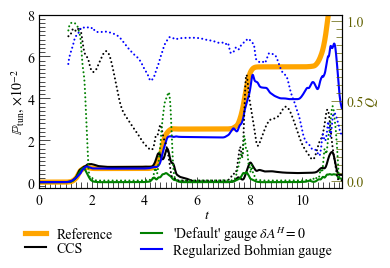

In [145]:
%matplotlib inline
#%matplotlib widget
blw=1.5
plot_data_map ={
    #0: [qp1_data, "gray", blw, r"Husimi flow, $A^{H}_n(p,x)$"],
    0: [qp201_data, "black", blw, r"CCS"],
    1: [qp1_data, "green", blw, r"'Default' gauge $\delta A^{H}{=}0$"],
    2: [qp3_data, "blue", blw, "Regularized Bohmian gauge"],
    #3: [qp101_data, "brown", 2.25, "Variational benchmark"],
    #3: [qp1_3_data, "purple", 2.25, r"Mixed flow"],
    #3: [qp201_3_data, "red", 2.25, r"Hybrid strategy"],
}
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(4, 3.))
CustomPlot1(fig, plot_data_map,legend_loc=(-0.05,-0.4),x_lim=[0,11.5],y_lim_l=[-0.3,8],legend_ncol = 2,legends_order=[0,1,2,3]);
#plt.savefig("fig.W02.eps",bbox_inches="tight")

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:79: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


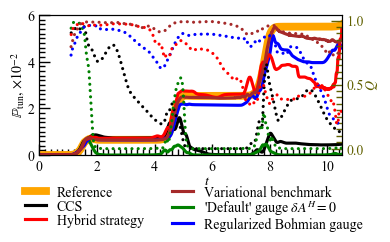

In [134]:
%matplotlib inline
#%matplotlib widget
plot_data_map ={
    #0: [qp1_data, "gray", 2.25, r"Husimi flow, $A^{H}_n(p,x)$"],
    0: [qp201_data, "black", 2.25, r"CCS"],
    1: [qp1_data, "green", 2.25, r"'Default' gauge $\delta A^{H}{=}0$"],
    2: [qp3_data, "blue", 2.25, "Regularized Bohmian gauge"],
    #3: [qp1_3_data, "purple", 2.25, r"Mixed flow"],
    3: [qp201_3_data, "red", 2.25, r"Hybrid strategy"],
    4: [qp101_data, "brown", 2.25, "Variational benchmark"]
}
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(4, 3.))
CustomPlot1(fig, plot_data_map,legend_loc=(-0.05,-0.55),x_lim=[0,10.5],y_lim_l=[0,6],legend_ncol = 2,legends_order=[0,1,4,5,2,3]);
#plt.savefig("fig.W02++.eps",bbox_inches="tight")

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:83: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


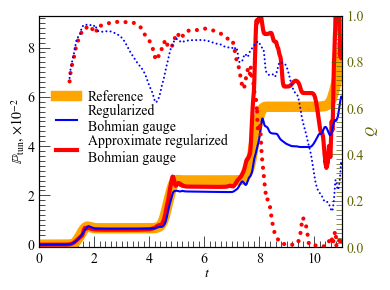

In [45]:
%matplotlib inline
#%matplotlib widget
blw = 1.5
plot_data_map = {
    0: [qp2_data, "red", blw * 2, "Approximate regularized \nBohmian gauge"],
    1: [qp3_data, "blue", blw, "Regularized\nBohmian gauge"],
}
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(4, 3.));
CustomPlot1(fig,
            plot_data_map,
            legend_loc=(0.05, 0.35),
            x_lim=[0, 11],
            y_lim_l=[-0.1, 9.3],
            y_lim_r=[0., 1],
            legend_ncol=1,
            legends_order=[0, 2, 1],
            y_ticks_scale_l=2,
            y_ticks_scale_r=0.2,
            x_ticks_scale=2);
plt.savefig("fig.W04.eps",bbox_inches="tight")

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:83: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


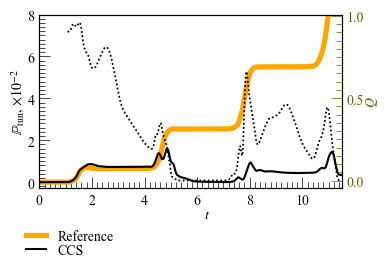

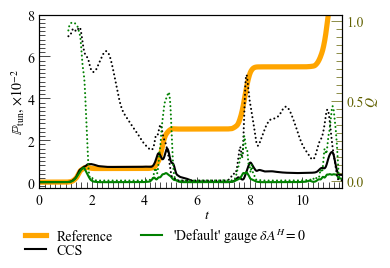

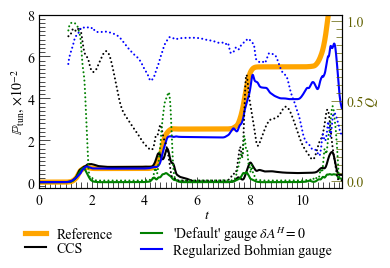

In [49]:
for i in range(1, 4):
    max_index = i
    plot_data_map = {
        #0: [qp1_data, "gray", blw, r"Husimi flow, $A^{H}_n(p,x)$"],
        0: [qp201_data, "black", blw, r"CCS"],
        1: [qp1_data, "green", blw, r"'Default' gauge $\delta A^{H}{=}0$"],
        2: [qp3_data, "blue", blw, "Regularized Bohmian gauge"],
        #3: [qp101_data, "brown", 2.25, "Variational benchmark"],
        #3: [qp1_3_data, "purple", 2.25, r"Mixed flow"],
        #3: [qp201_3_data, "red", 2.25, r"Hybrid strategy"],
    }
    plot_data_submap = {k: plot_data_map[k] for k in range(max_index)}
    plt.rcParams['figure.dpi'] = 100
    fig = plt.figure(figsize=(4, 3.))
    CustomPlot1(fig,
                plot_data_submap,
                legend_loc=(-0.05, -0.4),
                x_lim=[0, 11.5],
                y_lim_l=[-0.3, 8],
                legend_ncol=np.min([i,2]),
                legends_order=[0, 1, 2, 3][0:i+1])
    #plt.savefig("numerical_example_summary[0-"+str(max_index)+"].eps",bbox_inches="tight")

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:83: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


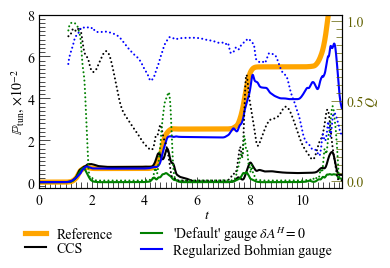

In [31]:
%matplotlib inline
#%matplotlib widget
blw=1.5
plot_data_map ={
    #0: [qp1_data, "gray", blw, r"Husimi flow, $A^{H}_n(p,x)$"],
    0: [qp201_data, "black", blw, r"CCS"],
    1: [qp1_data, "green", blw, r"'Default' gauge $\delta A^{H}{=}0$"],
    2: [qp3_data, "blue", blw, "Regularized Bohmian gauge"],
    #3: [qp101_data, "brown", 2.25, "Variational benchmark"],
    #3: [qp1_3_data, "purple", 2.25, r"Mixed flow"],
    #3: [qp201_3_data, "red", 2.25, r"Hybrid strategy"],
}
plt.rcParams['figure.dpi'] = 100
fig = plt.figure(figsize=(4, 3.))
CustomPlot1(fig, plot_data_map,legend_loc=(-0.05,-0.4),x_lim=[0,11.5],y_lim_l=[-0.3,8],legend_ncol = 2,legends_order=[0,1,2,3]);
#plt.savefig("fig.W02.eps",bbox_inches="tight")

#### Animations

Label(value='getting CS states...')

Label(value='-')

Label(value='-')

Label(value='-')

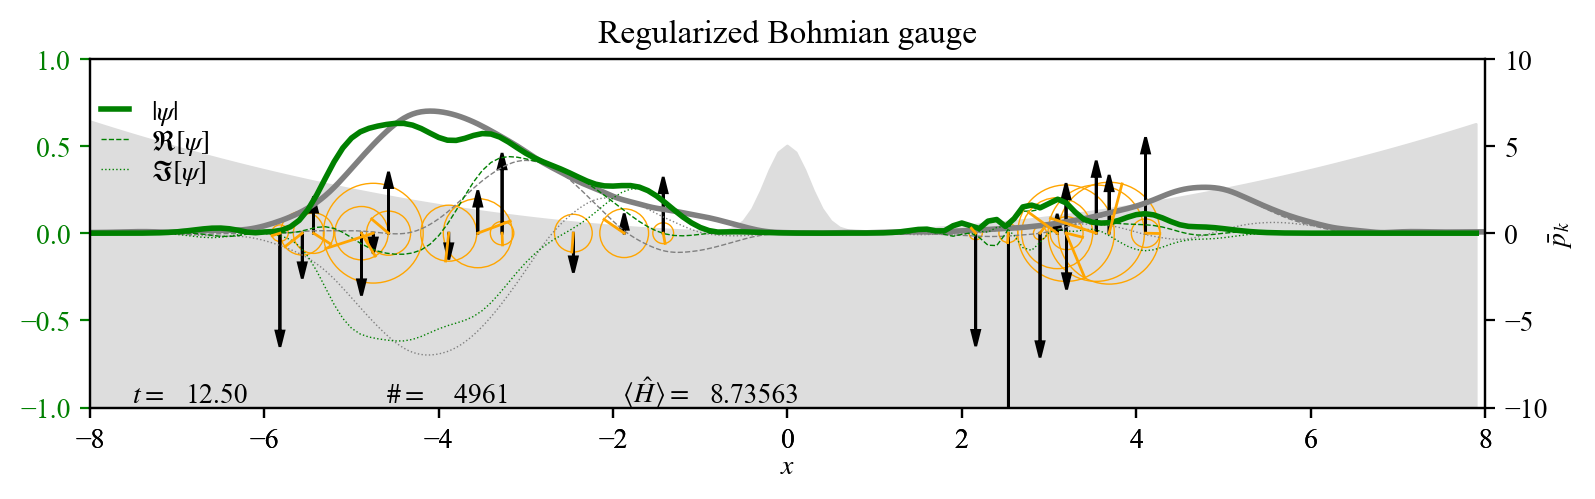

In [117]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
CustomAnimation2("simple_tunneling(run3)_05_method1=QPv3_.json",title = r"Regularized Bohmian gauge",
                 sparsity=1,time_step=0.1,fps=15,dpi=200,bitrate=-1);

Label(value='getting CS states...')

Label(value='-')

Label(value='-')

Label(value='-')

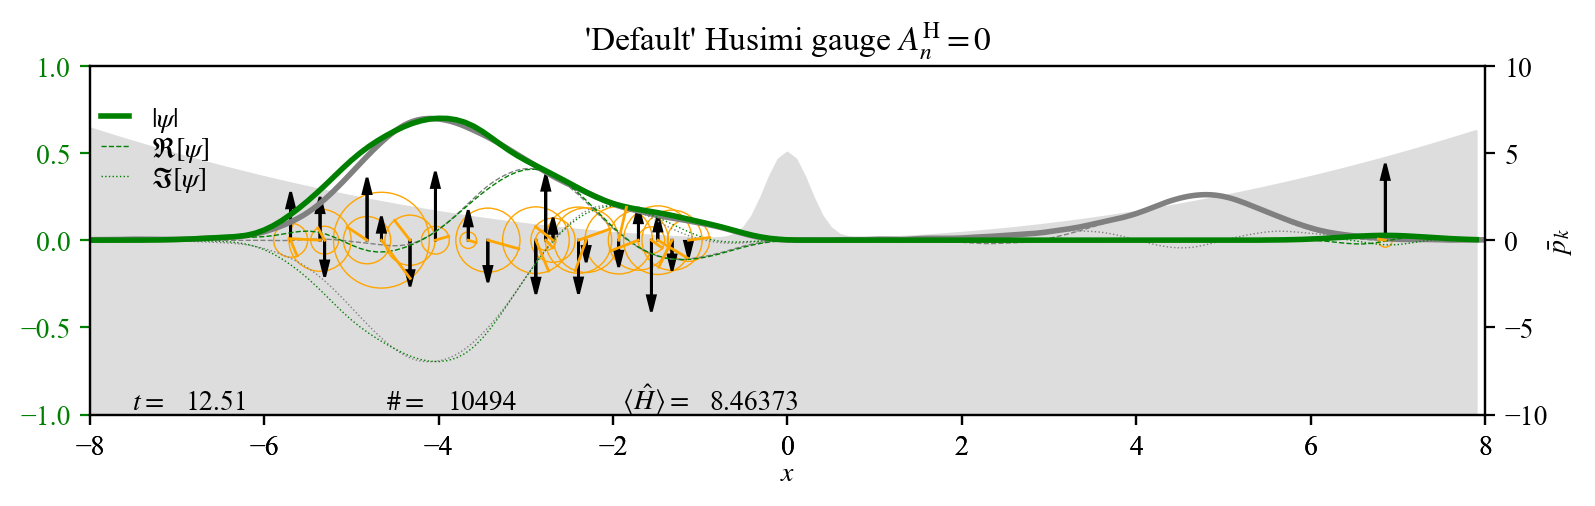

In [118]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
CustomAnimation2("simple_tunneling(run3)_05_method1=QPv1_.json",title = r"'Default' Husimi gauge $A^{\rm H}_n{=}0$",
                 sparsity=1,time_step=0.1,fps=15,dpi=200,bitrate=-1);

Label(value='getting CS states...')

Label(value='-')

Label(value='-')

Label(value='-')

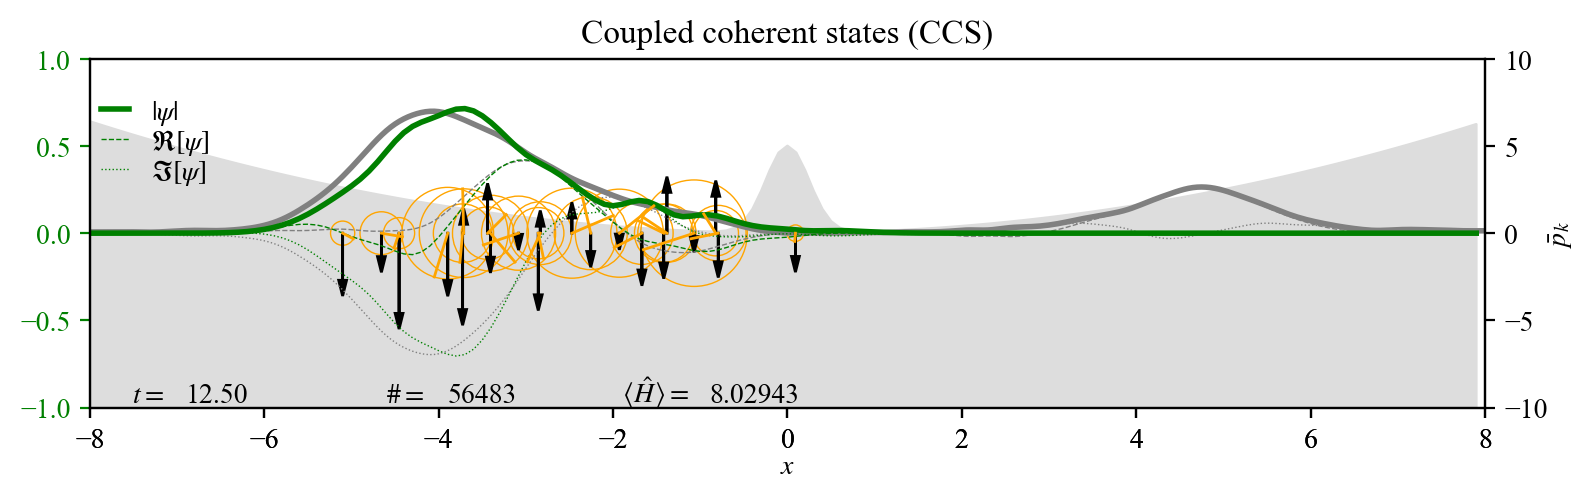

In [119]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
CustomAnimation2("simple_tunneling(run3)_05_method1=SLCH_.json",title = r"Coupled coherent states (CCS)",
                 sparsity=1,time_step=0.1,fps=15,dpi=200,bitrate=-1);

Label(value='getting CS states...')

Label(value='-')

Label(value='-')

Label(value='-')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'test.mp4' -> 'simple_tunneling(run3)_05_method1=SLCH_method2=QPv3_.mp4'

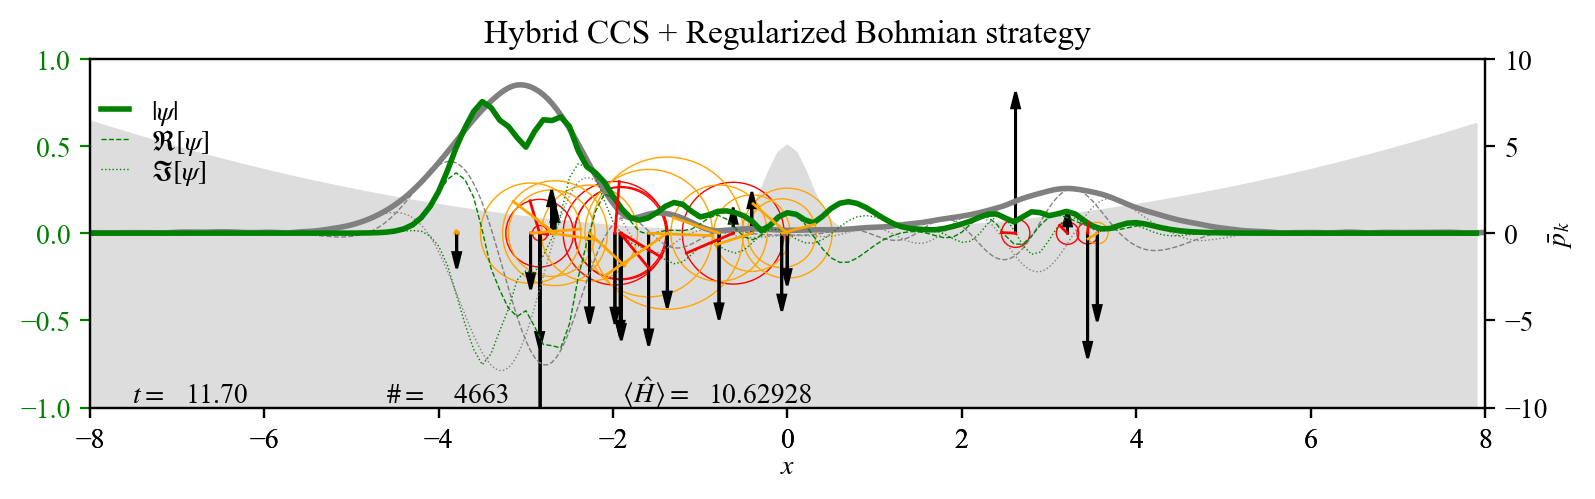

In [120]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
CustomAnimation2("simple_tunneling(run3)_05_method1=SLCH_method2=QPv3_.json",
                 title = r"Hybrid CCS + Regularized Bohmian strategy",sparsity=1,time_step=0.1,fps=15,dpi=200,bitrate=-1,secondary_offset=9);

Label(value='getting CS states...')

Label(value='-')

Label(value='-')

Label(value='-')

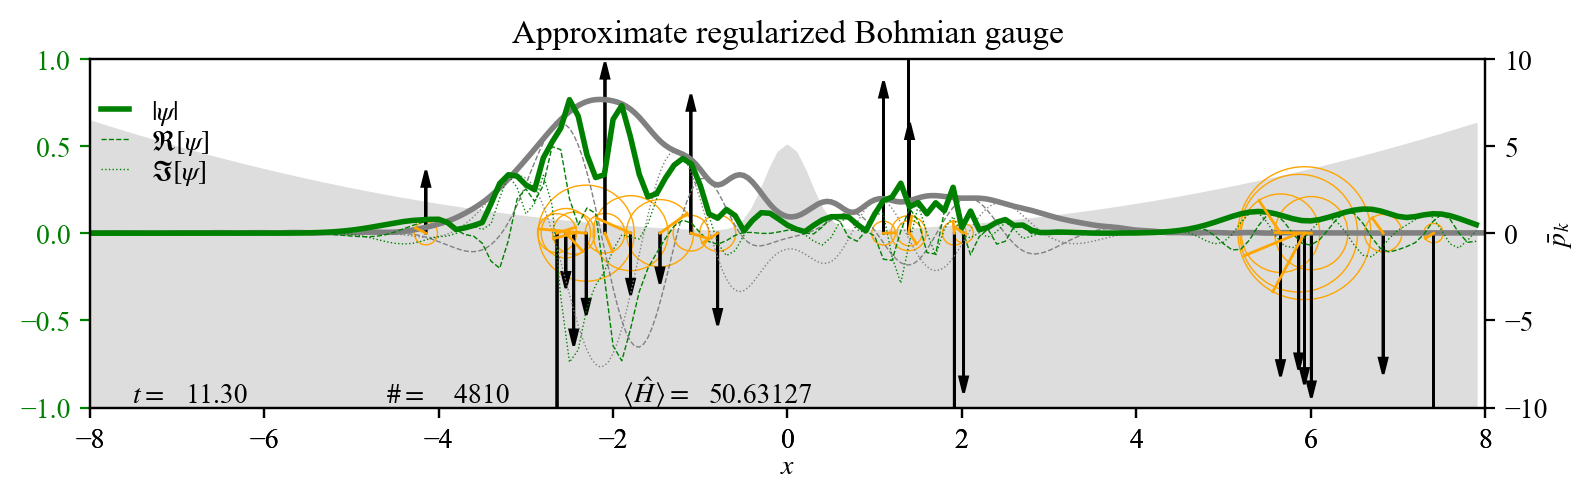

In [37]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
CustomAnimation2("simple_tunneling(run3)_05_method1=QPv2_.json",title = r"Approximate regularized Bohmian gauge",
                 sparsity=1,time_step=0.1,fps=15,dpi=200,bitrate=-1);

In [18]:
#import matplotlib.font_manager
#matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [ ]:
for i in range(1, 5):
    max_index = i
    plot_data_map = {
        0: [fb_data, "brown", 2, "Var. benchmark"],
        1: [qp1_data, "gray", 1.5, r"Def. gauge $A^{H}_n(p,x){=}0$"],
        2: [qp3_data, "blue", 1.5, r"Reg. Bohmian gauge"],
        3: [qp13_data, "green", 1.5, "Mixed flow"],
        4: [qp2_data, "red", 1.5, "Appr. gen. B. flow"]
    }
    plot_data_submap = {k: plot_data_map[k] for k in range(max_index)}
    fig = plt.figure(figsize=(4.6, 3.5))
    CustomPlot1(
        fig,
        plot_data_submap,
        legend_loc=(-0.1, -0.45),
        x_ticks_scale=2,
        y_ticks_scale_l=4,
        legend_ncol=min(i, 2)
        #, legends_order = [2,3,1,0,4]
    )
    plt.savefig(
        "numerical_example_summary[0-" + str(max_index) + "].eps",
        bbox_inches="tight")